In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import os
import json
import re
%matplotlib inline

In [2]:
def read_dynasty(dynasty = '宋'):
    edge_lists = []
    count = 0
    t = 0
    dynasty_dir = os.path.join('datas', dynasty)
    for fname in os.listdir(dynasty_dir):
        t += 1
        fpath = os.path.join(dynasty_dir, fname)
        f = open(fpath)
        json_data = json.load(f)
        if 'PersonSocialAssociation' in json_data:
            person_association = json_data["PersonSocialAssociation"]
            if 'Association' in person_association:
                person_assoc = person_association['Association']
                if isinstance(person_assoc, list):
                    for person in person_association['Association']:
                        if 'AssocPersonId' in person:
                            #print(fname[:fname.rfind('.')], person['AssocPersonId'])
                            edge_lists.append((fname[:fname.rfind('.')], person['AssocPersonId']))
                        count +=1
                        #if count > 10:break
                elif isinstance(person_assoc, dict):
                    #print('dict:', fname[:fname.rfind('.')], person_assoc['AssocPersonId'])
                    edge_lists.append((fname[:fname.rfind('.')], person_assoc['AssocPersonId']))
    print(count, t)
    G = nx.Graph()
    G.add_edges_from(edge_lists)
    #nx.draw(G, with_labels=False, font_weight='bold')
    print(nx.info(G)) 
    return G


In [3]:
# g = read_dynasty('唐')
# nx.write_gexf(g, "tang.gexf")
# g = read_dynasty('宋')
# nx.write_gexf(g, "song.gexf")
# g = read_dynasty('元')
# nx.write_gexf(g, "yuan.gexf")
# g = read_dynasty('明')
# nx.write_gexf(g, "ming.gexf")
# g = read_dynasty('清')
# nx.write_gexf(g, "qing.gexf")
# 288 50402
# Name: 
# Type: Graph
# Number of nodes: 365
# Number of edges: 286
# Average degree:   1.5671
# 78652 53531
# Name: 
# Type: Graph
# Number of nodes: 17114
# Number of edges: 30330
# Average degree:   3.5445
# 23083 23228
# Name: 
# Type: Graph
# Number of nodes: 6424
# Number of edges: 11864
# Average degree:   3.6936
# 27534 189622
# Name: 
# Type: Graph
# Number of nodes: 8350
# Number of edges: 14609
# Average degree:   3.4992
# 3920 89435
# Name: 
# Type: Graph
# Number of nodes: 3128
# Number of edges: 3059
# Average degree:   1.9559

In [13]:
def vis_network(graph, nodes_num = 100):
    '''
    实现网络的可视化，通过随机采样的方式对数据进行基本的可视化。
    当然更为合理的方式是将网络导入到gephi中。
    '''
    nodes = graph.nodes()
    nodes = np.array(nodes)
    samples = np.random.randint(0, len(nodes), nodes_num)
    samples_nodes = nodes[samples.tolist()]
    subgraph = graph.subgraph(samples_nodes)
    nx.draw(subgraph, pos=nx.draw_shell(subgraph), node_color='black', node_size=30, width=4)
    plt.show()

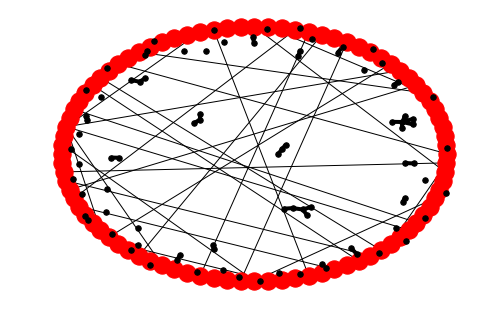

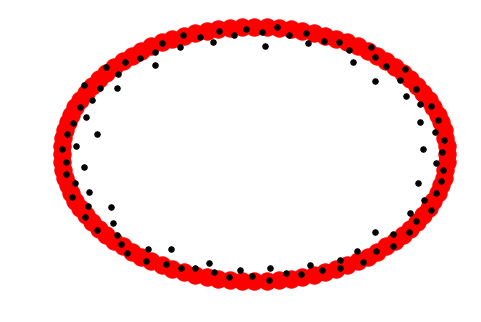

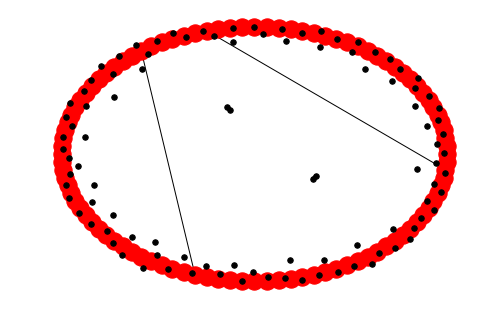

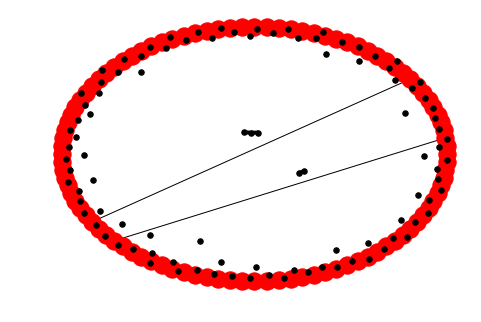

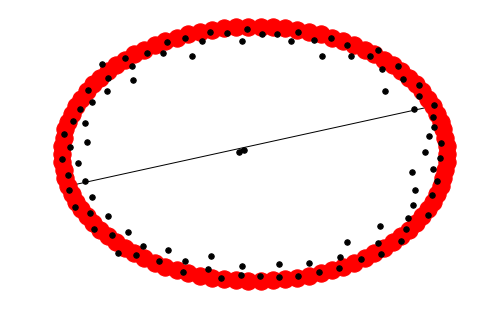

In [14]:
g = nx.read_gexf('tang.gexf')
vis_network(g)
g = nx.read_gexf('song.gexf')
vis_network(g)
g = nx.read_gexf('yuan.gexf')
vis_network(g)
g = nx.read_gexf('ming.gexf')
vis_network(g)
g = nx.read_gexf('qing.gexf')
vis_network(g)

365 0
1


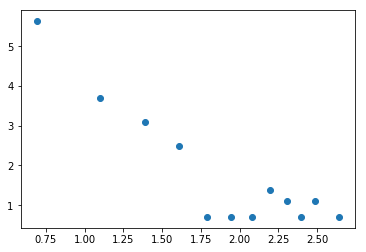

17114 0
1


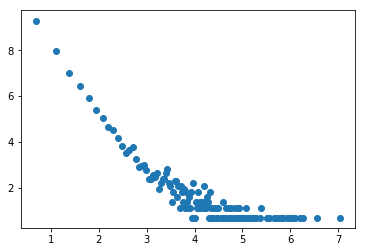

6424 0
1


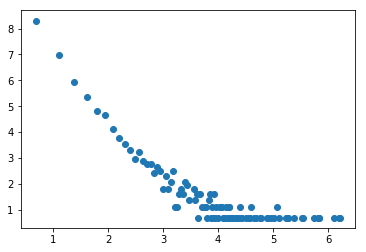

8350 0
1


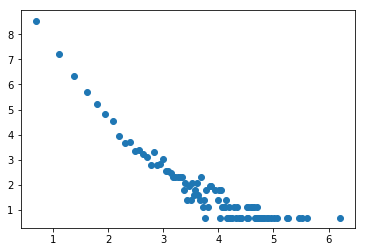

3128 0
1


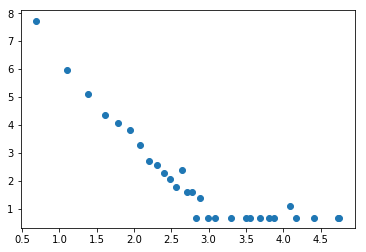

In [26]:
import collections
import math
from networkx.algorithms import approximation as approx
def vis_degree_distribution(graph):
    degree_seq = [d for n,d in graph.degree()]
    print(len(degree_seq), approx.node_connectivity(graph))
    degree = sorted(degree_seq, reverse=True)
    print(min(degree))
    degreeCount = collections.Counter(degree)
    deg, cnt = zip(*degreeCount.items())
    ln_deg = [math.log(i + 1) for i in deg]
    ln_cn = [math.log(i + 1) for i in cnt]
#     plt.bar(deg, cnt, width=0.8)
    plt.scatter(ln_deg, ln_cn)
    plt.show()
g = nx.read_gexf('tang.gexf')
vis_degree_distribution(g)
g = nx.read_gexf('song.gexf')
vis_degree_distribution(g)
g = nx.read_gexf('yuan.gexf')
vis_degree_distribution(g)
g = nx.read_gexf('ming.gexf')
vis_degree_distribution(g)
g = nx.read_gexf('qing.gexf')
vis_degree_distribution(g)


In [33]:
g = nx.read_gexf('ming.gexf')
# connected_g = nx.connected_components(g)
for i in nx.connected_components(g):
    largest_nodes = i
    largest_g = g.subgraph(largest_nodes)
    print(nx.info(largest_g))
    print(nx.average_shortest_path_length(largest_g))
    break
# largest = sorted(, key = len, reverse=True)[0]
# print(nx.average_shortest_path_length(largest))

Name: 
Type: SubGraph
Number of nodes: 7933
Number of edges: 14354
Average degree:   3.6188
4.655342915729116


In [ ]:
def get_signed_graph(dy)